# Task1

In [16]:
from pyopenms import *
seq=AASequence.fromString("DFPI")
print(str(seq))
sum=0
for aa in seq:
    print(aa.getName(),":",aa.getMonoWeight())
    sum+=aa.getMonoWeight()
print("\nsum of seguence : ",sum)
mfull=seq.getMonoWeight()
print("full sum of sequence :", mfull,"\n there are different in mass")


DFPI
Aspartate : 133.0375092233
Phenylalanine : 165.0789793509
Proline : 115.0633292871
Isoleucine : 131.0946294147

sum of seguence :  544.2744472759999
full sum of sequence : 490.2427520846 
 there are different in mass


# Task2

In [17]:
import pyopenms
help(pyopenms.Constants)
print ("Avogadro's number is", pyopenms.Constants.AVOGADRO)

Help on module pyopenms.Constants in pyopenms:

NAME
    pyopenms.Constants

DESCRIPTION
    # @brief Mathematical and physical constants namespace.
    # 
    # This namespace contains definitions for some basic mathematical and physical constants.
    # All constants are double precision.

DATA
    AVOGADRO = 6.0221367e+23
    BOHR_RADIUS = 5.29177249e-11
    BOLTZMANN = 1.380657e-23
    C13C12_MASSDIFF_U = 1.0033548378
    CAL_PER_JOULE = 0.2390057361376673
    DEG_PER_RAD = 57.29577951308232
    E = 2.718281828459045
    ELECTRON_MASS = 9.1093897e-31
    ELECTRON_MASS_U = 0.0005485799042984105
    ELEMENTARY_CHARGE = 1.60217738e-19
    EPSILON = 1e-06
    F = 96485.31200007845
    FARADAY = 96485.31200007845
    FINE_STRUCTURE_CONSTANT = 0.00729735
    FRAGMENT_ANNOTATION_USERPARAM = 'fragment_annotation'
    GAS_CONSTANT = 8.314505189811898
    GRAVITATIONAL_CONSTANT = 6.67259e-11
    JOULE_PER_CAL = 4.184
    MM_PER_INCH = 25.4
    MOL = 6.0221367e+23
    M_PER_FOOT = 3.048
    N

In [18]:
edb = ElementDB()
oxygen_isoDist = {"mass": [], "abundance": []}
sulfur_isoDist = {"mass": [], "abundance": []}

oxygen = edb.getElement("O")
isotopes = oxygen.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print ("Oxygen isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    oxygen_isoDist["mass"].append(iso.getMZ())
    oxygen_isoDist["abundance"].append((iso.getIntensity() * 100))

sulfur = edb.getElement("S")
isotopes = sulfur.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print ("Sulfur isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    sulfur_isoDist["mass"].append(iso.getMZ())
    sulfur_isoDist["abundance"].append((iso.getIntensity() * 100))

Oxygen isotope 15.994915 has abundance 99.75699782371521 %
Oxygen isotope 16.999132 has abundance 0.03800000122282654 %
Oxygen isotope 17.999169 has abundance 0.20500000100582838 %
Sulfur isotope 31.97207073 has abundance 94.92999911308289 %
Sulfur isotope 32.971458 has abundance 0.7600000128149986 %
Sulfur isotope 33.967867 has abundance 4.2899999767541885 %
Sulfur isotope 35.967081 has abundance 0.019999999494757503 %


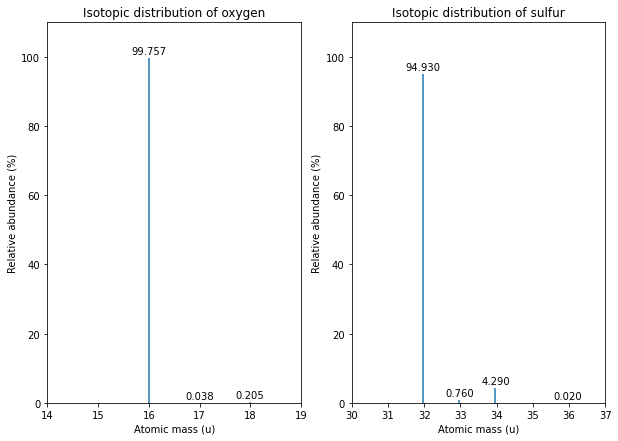

In [19]:
import math
from matplotlib import pyplot as plt

# very simple overlappping correction of annotations
def adjustText(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate('%0.3f' % (y2), xy=(x2, y2), xytext=(x2+0.5,y2+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')
    else:
        plt.annotate('%0.3f' % (y1), xy=(x1, y1), xytext=(x1+0.5,y1+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')


def plotDistribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i])
        if int(distribution["mass"][i - 1]) == int(distribution["mass"][i]) \
                and i != 0:
            adjustText(distribution["mass"][i - 1], distribution["abundance"][i - 1],
                       distribution["mass"][i], distribution["abundance"][i])
        else:
            plt.text(x=distribution["mass"][i],
                     y=(distribution["abundance"][i] + 2),
                     s='%0.3f' % (distribution["abundance"][i]), va='center',
                     ha='center')
    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))


plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Isotopic distribution of oxygen")
plotDistribution(oxygen_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,2,2)
plt.title("Isotopic distribution of sulfur")
plotDistribution(sulfur_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

In [20]:
edb = ElementDB()
isotopes = edb.getElement("C").getIsotopeDistribution().getContainer()
carbon_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()
isotopes = edb.getElement("N").getIsotopeDistribution().getContainer()
nitrogen_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()

print ("Mass difference between 12C and 13C:", carbon_isotope_difference)
print ("Mass difference between 14N and N15:", nitrogen_isotope_difference)
print ("Relative deviation:", 100*(carbon_isotope_difference -
        nitrogen_isotope_difference)/carbon_isotope_difference, "%")

Mass difference between 12C and 13C: 1.0033550000000009
Mass difference between 14N and N15: 0.9970350000000003
Relative deviation: 0.6298867300208343 %


In [21]:
from pyopenms.Constants import *

helium = ElementDB().getElement("He")
isotopes = helium.getIsotopeDistribution()

mass_sum = 2*PROTON_MASS_U + 2*ELECTRON_MASS_U + 2*NEUTRON_MASS_U
helium4 = isotopes.getContainer()[1].getMZ()
print ("Sum of masses of 2 protons, neutrons and electrons:", mass_sum)
print ("Mass of He4:", helium4)
print ("Difference between the two masses:", 100*(mass_sum - helium4)/mass_sum, "%")

Sum of masses of 2 protons, neutrons and electrons: 4.032979924670597
Mass of He4: 4.00260325415
Difference between the two masses: 0.7532065888743016 %


In [22]:
from pyopenms.Constants import *

helium = ElementDB().getElement("He")
isotopes = helium.getIsotopeDistribution()

mass_sum = 2*PROTON_MASS_U + 2*ELECTRON_MASS_U + 2*NEUTRON_MASS_U
helium4 = isotopes.getContainer()[1].getMZ()
print ("Sum of masses of 2 protons, neutrons and electrons:", mass_sum)
print ("Mass of He4:", helium4)
print ("Difference between the two masses:", 100*(mass_sum - helium4)/mass_sum, "%")

Sum of masses of 2 protons, neutrons and electrons: 4.032979924670597
Mass of He4: 4.00260325415
Difference between the two masses: 0.7532065888743016 %


In [28]:
methanol = EmpiricalFormula("CH3OH")
water = EmpiricalFormula("H2O")
ethanol = EmpiricalFormula("CH2") + methanol
print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol has", ethanol.getElementalComposition()[b"H"], "hydrogen atoms")

Ethanol chemical formula: C2H6O1
Ethanol composition: {b'C': 2, b'H': 6, b'O': 1}
Ethanol has 6 hydrogen atoms


In [22]:
from pyopenms.Constants import *
methanol = EmpiricalFormula("CH3OH")
ethanol = EmpiricalFormula("CH2") + methanol
methanol_isoDist = {"mass": [], "abundance": []}
ethanol_isoDist = {"mass": [], "abundance": []}
print("Coarse Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution( CoarseIsotopePatternGenerator(4) )
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")

for iso in isotopes.getContainer():
        print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
        methanol_isoDist["mass"].append(iso.getMZ())
        methanol_isoDist["abundance"].append((iso.getIntensity() * 100))
print("Fine Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution( FineIsotopePatternGenerator(1e-3) )
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")
for iso in isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")      
    ethanol_isoDist["mass"].append(iso.getMZ())
    ethanol_isoDist["abundance"].append((iso.getIntensity() * 100))

Coarse Isotope Distribution:
This covers 1.0000000131221896 probability
Isotope 46.0418651914 has abundance 97.56630063056946 %
Isotope 47.045220029199996 has abundance 2.214995212852955 %
Isotope 48.048574867 has abundance 0.21421683486551046 %
Isotope 49.0519297048 has abundance 0.004488633931032382 %
Fine Isotope Distribution:
This covers 0.9994461630121805 probability
Isotope 46.0418651914 has abundance 97.5662887096405 %
Isotope 47.0452201914 has abundance 2.110501006245613 %
Isotope 47.0481419395 has abundance 0.06732848123647273 %
Isotope 48.046119191399995 has abundance 0.20049810409545898 %


In [ ]:
#######################################################################################################################

In [23]:
from urllib.request import urlretrieve
from pyopenms import *
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-extra/master"
urlretrieve (gh + "/src/data/YIC(Carbamidomethyl)DNQDTISSK.mzML", "observed.mzML")

exp = MSExperiment()
MzMLFile().load("observed.mzML", exp)

spectra = exp.getSpectra()
observed_spectrum = spectra[0]

In [24]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
peptide = AASequence.fromString("YIC(Carbamidomethyl)DNQDTISSK")
tsg.getSpectrum(theo_spectrum, peptide, 1, 2)

212.012451171875
795.2837524414062


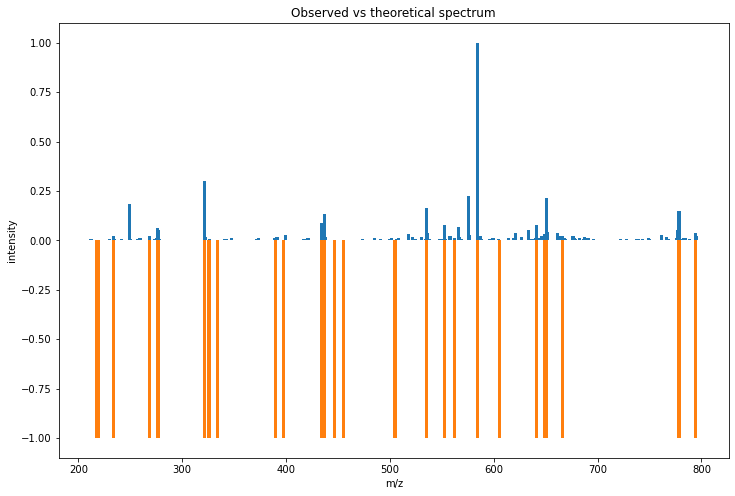

In [3]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()

print(min(obs_mz)) 
print(max(obs_mz)) 

theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [4]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

In [5]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 16
ion	theo. m/z	observed m/z
y2+	1	234.14483407287105	234.12303161621094
y5++	2	268.157941636671	268.1054382324219
b2+	1	277.154670104771	277.24560546875
y3+	1	321.17686323237103	321.2969970703125
y4+	1	434.26092758327104	434.2879638671875
b3+	1	437.185319089971	437.291259765625
y5+	1	535.308606806571	535.18896484375
b4+	1	552.212263249471	552.3375244140625
b9++	2	562.239866948271	562.4213256835938
y10++	2	584.250963512071	584.4120483398438
y11++	2	640.792995687521	640.9539184570312
b11++	2	649.2718961077711	649.0973510742188
y6+	1	650.335550966071	650.3652954101562
b5+	1	666.255191440871	666.1763305664062
y7+	1	778.394129221271	778.3391723632812
b6+	1	794.3137696960711	794.192138671875


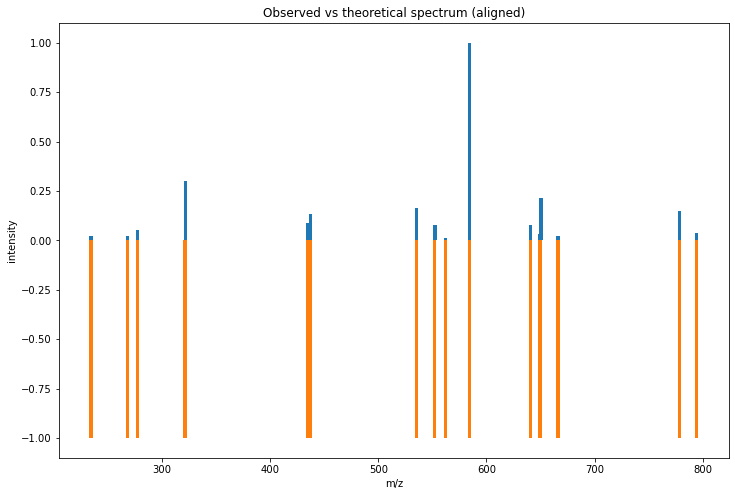

In [6]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [6]:
dig.digest(bsa, result, 7, 40)
for s in result:
    print(s.toString())

WVTFISLLLLFSSAYSR
DLGEEHFK
GLVLIAFSQYLQQCPFDEHVK
LVNELTEFAK
TCVADESHAGCEK
SLHTLFGDELCK
ETYGDMADCCEK
NECFLSHK
DDSPDLPK
LKPDPNTLCDEFK
YLYEIAR
HPYFYAPELLYYANK
YNGVFQECCQAEDK
GACLLPK
VLASSAR
AEFVEVTK
LVTDLTK
ECCHGDLLECADDR
YICDNQDTISSK
ECCDKPLLEK
SHCIAEVEK
DAIPENLPPLTADFAEDK
DAFLGSFLYEYSR
HPEYAVSVLLR
EYEATLEECCAK
DDPHACYSTVFDK
HLVDEPQNLIK
QNCDQFEK
LGEYGFQNALIVR
VPQVSTPTLVEVSR
CCTKPESER
MPCTEDYLSLILNR
LCVLHEK
CCTESLVNR
RPCFSALTPDETYVPK
LFTFHADICTLPDTEK
QTALVELLK
ATEEQLK
TVMENFVAFVDK
CCAADDK
EACFAVEGPK
LVVSTQTALA


In [7]:
dig.setMissedCleavages(2)
dig.digest(bsa, result, 7, 40)
for s in result:
    print(s.toString())

WVTFISLLLLFSSAYSR
DLGEEHFK
GLVLIAFSQYLQQCPFDEHVK
LVNELTEFAK
TCVADESHAGCEK
SLHTLFGDELCK
ETYGDMADCCEK
NECFLSHK
DDSPDLPK
LKPDPNTLCDEFK
YLYEIAR
HPYFYAPELLYYANK
YNGVFQECCQAEDK
GACLLPK
VLASSAR
AEFVEVTK
LVTDLTK
ECCHGDLLECADDR
YICDNQDTISSK
ECCDKPLLEK
SHCIAEVEK
DAIPENLPPLTADFAEDK
DAFLGSFLYEYSR
HPEYAVSVLLR
EYEATLEECCAK
DDPHACYSTVFDK
HLVDEPQNLIK
QNCDQFEK
LGEYGFQNALIVR
VPQVSTPTLVEVSR
CCTKPESER
MPCTEDYLSLILNR
LCVLHEK
CCTESLVNR
RPCFSALTPDETYVPK
LFTFHADICTLPDTEK
QTALVELLK
ATEEQLK
TVMENFVAFVDK
CCAADDK
EACFAVEGPK
LVVSTQTALA
MKWVTFISLLLLFSSAYSR
WVTFISLLLLFSSAYSRGVFR
DTHKSEIAHR
SEIAHRFK
FKDLGEEHFK
DLGEEHFKGLVLIAFSQYLQQCPFDEHVK
GLVLIAFSQYLQQCPFDEHVKLVNELTEFAK
LVNELTEFAKTCVADESHAGCEK
TCVADESHAGCEKSLHTLFGDELCK
SLHTLFGDELCKVASLR
VASLRETYGDMADCCEK
ETYGDMADCCEKQEPER
QEPERNECFLSHK
NECFLSHKDDSPDLPK
DDSPDLPKLKPDPNTLCDEFK
LKPDPNTLCDEFKADEK
FWGKYLYEIAR
YLYEIARR
RHPYFYAPELLYYANK
HPYFYAPELLYYANKYNGVFQECCQAEDK
YNGVFQECCQAEDKGACLLPK
GACLLPKIETMR
IETMREK
EKVLASSAR
VLASSARQR
LRCASIQK
CASIQKFGER
FGERALK
ALKAWSVAR
AWSVARLS

In [9]:
names = []
ProteaseDB().getAllNames(names)
len(names) # at least 25 by default
e = ProteaseDB().getEnzyme('Lys-C')
e.getRegExDescription()
e.getRegEx()

'(?<=[KX])(?!P)'

In [24]:
# lycin
from urllib.request import urlretrieve
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-extra/master"
urlretrieve (gh + "/src/data/P02769.fasta", "bsa.fasta")

dig = ProteaseDigestion()
dig.setEnzyme('Lys-C')
bsa = "".join([l.strip() for l in open("bsa.fasta").readlines()[1:]])
bsa = AASequence.fromString(bsa)

result = []
dig.digest(bsa, result)
print(result[4].toString())
len(result) 

LVNELTEFAK
GLVLIAFSQYLQQCPFDEHVK


57

In [5]:
# trypcin
from pyopenms import *
from urllib.request import urlretrieve
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-extra/master"
urlretrieve (gh + "/src/data/P02769.fasta", "bsa.fasta")

dig = ProteaseDigestion()
dig.getEnzymeName() # Trypsin
bsa = "".join([l.strip() for l in open("bsa.fasta").readlines()[1:]])
bsa = AASequence.fromString(bsa)
result = []
dig.digest(bsa, result)
print(result[4].toString())
len(result) 

DTHK


82

In [32]:
db = RNaseDB()
names = []
db.getAllNames(names)
names
e = db.getEnzyme("RNase_T1")
e.getRegEx()
e.getThreePrimeGain()


'p'

In [25]:
oligo = NASequence.fromString("pAUGUCGCAG");

dig = RNaseDigestion()
dig.setEnzyme("RNase_T1")

result = []
dig.digest(oligo, result)
for fragment in result:
  print (fragment)

print("Looking closer at", result[0])
print(" Five Prime modification:", result[0].getFivePrimeMod().getCode())
print(" Three Prime modification:", result[0].getThreePrimeMod().getCode())
for ribo in result[0]:
  print (ribo.getCode(), ribo.getMonoMass(), ribo.isModified())

pAUGp
UCGp
CAG
Looking closer at pAUGp
 Five Prime modification: 5'-p
 Three Prime modification: 3'-p
A 267.0968 False
U 244.0695 False
G 283.0917 False


In [34]:
from pyopenms import *
import matplotlib.pyplot as plt
exp = MSExperiment()
MzMLFile().load("F:\\Project\\XMLData\\3-F9.mzML", exp)

In [17]:
def plotSpectrun(index):
    fig = plt.subplots(figsize =(10, 7))
    spec=exp[index]
    mz, intensity = spec.get_peaks()
    
    p1 = plt.bar(mz, intensity)
    plt.ylim([0, max(intensity)])
    plt.xlim([100, 800])
    
    plt.title("MS Level: " + str(spec.getMSLevel()))
    plt.ylabel('Intensity')
    plt.xlabel('m/z')
    plt.show()

    plotSpectrun(1000)
    plotSpectrun(10010)


# Task3 (yeast)

In [18]:
from pyopenms import *
from urllib.request import urlretrieve

urlretrieve ("file:///C:/Users/Laptop%20Market/Downloads/uniprot-yourlist_M202111204ABAA9BC7178C81CEBC9459510EDDEA33004E50.fasta", "yourlist_M202111204ABAA9BC7178C81CEBC9459510EDDEA33004E50.fasta")

dig = ProteaseDigestion()
dig.getEnzymeName() # Trypsin
bsa = "".join([l.strip() for l in open("yourlist_M202111204ABAA9BC7178C81CEBC9459510EDDEA33004E50.fasta").readlines()[1:]])
bsa = AASequence.fromString(bsa)

result = []
dig.digest(bsa, result)
print(result[4].toString())
print(len(result))

print("#"*50)

dig.digest(bsa, result, 7, 40)
for s in result:
    print(s.toString())

print("#"*50)


dig.setMissedCleavages(2)
dig.digest(bsa, result, 7, 40)
for s in result:
    print(s.toString())
    
print("#"*50)

names = []
ProteaseDB().getAllNames(names)
print(len(names))
e = ProteaseDB().getEnzyme('Lys-C')
e.getRegExDescription()
e.getRegEx()


AYR
59
##################################################
FYDILGVPVTATDVEIK
NPSEEAAEK
EASAAYEILSDPEK
HEISASLEELYK
CTSCNGQGIK
QMGPMIQR
FQTECDVCHGTGDIIDPK
ILEVHVEPGMK
GEADQAPDVIPGDVVFIVSERPHK
DGDDLVYEAEIDLLTAIAGGEFALEHVSGDWLK
VGIVPGEVIAPGMR
YGGYGNLIIK
FPENHFTSEENLK
LEEILPPR
IVPAIPK
ATVDECVLADFDPAK
GGANYDSDEEEQGGEGVQCASQ
##################################################
FYDILGVPVTATDVEIK
NPSEEAAEK
EASAAYEILSDPEK
HEISASLEELYK
CTSCNGQGIK
QMGPMIQR
FQTECDVCHGTGDIIDPK
ILEVHVEPGMK
GEADQAPDVIPGDVVFIVSERPHK
DGDDLVYEAEIDLLTAIAGGEFALEHVSGDWLK
VGIVPGEVIAPGMR
YGGYGNLIIK
FPENHFTSEENLK
LEEILPPR
IVPAIPK
ATVDECVLADFDPAK
GGANYDSDEEEQGGEGVQCASQ
ETKFYDILGVPVTATDVEIK
FYDILGVPVTATDVEIKK
CALKYHPDK
YHPDKNPSEEAAEK
NPSEEAAEKFK
FKEASAAYEILSDPEK
EASAAYEILSDPEKR
DIKHEISASLEELYK
HEISASLEELYKGR
TAKLALNK
LALNKQILCK
QILCKECEGR
ECEGRGGK
KCTSCNGQGIK
CTSCNGQGIKFVTR
FVTRQMGPMIQR
QMGPMIQRFQTECDVCHGTGDIIDPK
FQTECDVCHGTGDIIDPKDR
CKSCNGK
KILEVHVEPGMK
ILEVHVEPGMKDGQR
DGQRIVFK
IVFKGEADQAPDVIPGDVVFIVSERPHK
GEADQAPDVIPGDVVFIVSERPH

'(?<=[KX])(?!P)'

In [21]:
from urllib.request import urlretrieve
urlretrieve ("file:///C:/Users/Laptop%20Market/Downloads/uniprot-yourlist_M202111204ABAA9BC7178C81CEBC9459510EDDEA33004E50.fasta", "yourlist_M202111204ABAA9BC7178C81CEBC9459510EDDEA33004E50.fasta")

dig = ProteaseDigestion()
dig.setEnzyme('Lys-C')
bsa = "".join([l.strip() for l in open("yourlist_M202111204ABAA9BC7178C81CEBC9459510EDDEA33004E50.fasta").readlines()[1:]])
bsa = AASequence.fromString(bsa)
result = []
dig.digest(bsa, result)
print(result[4].toString())
len(result)

AYRK


42

# Task4 (Decoy)

In [1]:
from pyopenms import *
 
protein_id = ProteinIdentification()
protein_id.setIdentifier("IdentificationRun1")
 
protein_hit = ProteinHit()
protein_hit.setAccession("sp|MyAccession")
protein_hit.setSequence("PEPTIDERDLQMTQSPSSLSVSVGDRPEPTIDE")
protein_hit.setScore(1.0)
protein_hit.setMetaValue("target_decoy", b"target")

protein_id.setHits([protein_hit])

In [5]:
now = DateTime.now()
date_string = now.getDate()
protein_id.setDateTime(now)

search_parameters = SearchParameters()
search_parameters.db = "database"
search_parameters.charges = "+2"
protein_id.setSearchParameters(search_parameters)

protein_id.setSearchEngineVersion("v1.0.0")
protein_id.setSearchEngine("SearchEngine")
protein_id.setScoreType("HyperScore")

for hit in protein_id.getHits():
  print("Protein hit accession:", hit.getAccession())
  print("Protein hit sequence:", hit.getSequence())
  print("Protein hit score:", hit.getScore())

Protein hit accession: sp|MyAccession
Protein hit sequence: PEPTIDERDLQMTQSPSSLSVSVGDRPEPTIDE
Protein hit score: 1.0


In [6]:
peptide_id = PeptideIdentification()

peptide_id.setRT(1243.56)
peptide_id.setMZ(440.0)
peptide_id.setScoreType("ScoreType")
peptide_id.setHigherScoreBetter(False)
peptide_id.setIdentifier("IdentificationRun1")

peptide_id.setMetaValue("AdditionalMetaValue", "Value")

peptide_hit = PeptideHit()
peptide_hit.setScore(1.0)
peptide_hit.setRank(1)
peptide_hit.setCharge(2)
peptide_hit.setSequence(AASequence.fromString("DLQM(Oxidation)TQSPSSLSVSVGDR"))

ev = PeptideEvidence()
ev.setProteinAccession("sp|MyAccession")
ev.setAABefore(b"R")
ev.setAAAfter(b"P")
ev.setStart(123)
ev.setEnd(141)
peptide_hit.setPeptideEvidences([ev])

peptide_hit2 = PeptideHit()
peptide_hit2.setScore(0.5)
peptide_hit2.setRank(2)
peptide_hit2.setCharge(2)
peptide_hit2.setSequence(AASequence.fromString("QDLMTQSPSSLSVSVGDR"))
peptide_hit2.setPeptideEvidences([ev])

peptide_id.setHits([peptide_hit, peptide_hit2])

In [7]:
peptide_ids = [peptide_id]
for peptide_id in peptide_ids:
  print ("Peptide ID m/z:", peptide_id.getMZ())
  print ("Peptide ID rt:", peptide_id.getRT())
  print ("Peptide ID score type:", peptide_id.getScoreType())
for hit in peptide_id.getHits():
    print(" - Peptide hit rank:", hit.getRank())
    print(" - Peptide hit sequence:", hit.getSequence())
    print(" - Peptide hit score:", hit.getScore())
    print(" - Mapping to proteins:", [ev.getProteinAccession() for ev in hit.getPeptideEvidences() ] )

Peptide ID m/z: 440.0
Peptide ID rt: 1243.56
Peptide ID score type: ScoreType
 - Peptide hit rank: 1
 - Peptide hit sequence: DLQM(Oxidation)TQSPSSLSVSVGDR
 - Peptide hit score: 1.0
 - Mapping to proteins: ['sp|MyAccession']
 - Peptide hit rank: 2
 - Peptide hit sequence: QDLMTQSPSSLSVSVGDR
 - Peptide hit score: 0.5
 - Mapping to proteins: ['sp|MyAccession']


In [26]:
IdXMLFile().store("out.idXML", [protein_id], peptide_ids)

prot_ids = []; pep_ids = []
IdXMLFile().load("out.idXML", prot_ids, pep_ids)

for protein_id in prot_ids:
      for hit in protein_id.getHits():
        print("Protein hit accession:", hit.getAccession())
        print("Protein hit sequence:", hit.getSequence())
        print("Protein hit score:", hit.getScore())
        print("Protein hit target/decoy:", hit.getMetaValue("target_decoy"))

print(50*"#")
print()
for peptide_id in pep_ids:
    print("Peptide ID m/z:",peptide_id.getMZ())
    print ("Peptide ID rt:", peptide_id.getRT())
    print ("Peptide ID score type:", peptide_id.getScoreType())

print(50*"#")
print()
for hit in peptide_id.getHits():
    print(" - Peptide hit rank:", hit.getRank())
    print(" - Peptide hit sequence:", hit.getSequence())
    print(" - Peptide hit score:", hit.getScore())
    print(" - Mapping to proteins:", [ev.getProteinAccession() for ev in hit.getPeptideEvidences() ] )

Protein hit accession: sp|MyAccession
Protein hit sequence: PEPTIDERDLQMTQSPSSLSVSVGDRPEPTIDE
Protein hit score: 1.0
Protein hit target/decoy: target
##################################################

##################################################

 - Peptide hit rank: 0
 - Peptide hit sequence: QDLMTQSPSSLSVSVGDR
 - Peptide hit score: 0.5
 - Mapping to proteins: ['sp|MyAccession']
 - Peptide hit rank: 0
 - Peptide hit sequence: DLQM(Oxidation)TQSPSSLSVSVGDR
 - Peptide hit score: 1.0
 - Mapping to proteins: ['sp|MyAccession']
